# Logistic Regression On Pima Indians Diabetes DataSet

## About the dataset
The Pima Indian diabetes dataset was performed on 768 female patients of at least 21years old. These females were all of the Pima Indian heritage. 268 of these women tested positive while 500 tested negative. In the dataset, each instance has 8 attributes and the are all numeric. The attributes include:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

### Import Classes and Functions

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

### Load and Describe Dataset

In [2]:
#loading the dataset
dataframe =  pd.read_csv("diabetes.xls")

#preview dataset
dataframe.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte

In [ ]:
#Getting more insight about data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Getting more insight about data
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Get number of instances and number of attributes
print(dataframe.shape)
#Display column names
print(list(dataframe.columns))

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# Number of people who have diabetes and number who dont
dataframe['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Missing Values and Data Quality

In [ ]:
#Checking for missing values
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking for balance

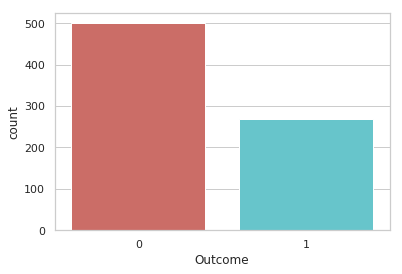

<Figure size 432x288 with 0 Axes>

In [ ]:
#Checking if data is unbalanced. Output is 60:40 hence not bad
sns.countplot(x='Outcome',data=dataframe,palette='hls')
plt.show()
plt.savefig('count_plot')

### Over-sampling using SMOTE
You can notice that out data is not balanced.
Using the SMOTE algorithm(Synthetic Minority Oversampling Technique) we can up-sample the positive outcome. 

Works by creating synthetic samples from the smaller class (positive) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [ ]:
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
    
X = dataframe.loc[:, dataframe.columns != 'Outcome']
y = dataframe.loc[:, dataframe.columns == 'Outcome']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=dataframe.columns[:8] )
os_data_y = pd.DataFrame(data=os_data_y.ravel(),columns=['Outcome'])

# Printing the outcomes
print("length of oversampled data is ",len(os_data_X))
print("Number of positively tested in oversampled data",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0]))
print("Number of negatively tested",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1]))
print("Proportion of positively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0])/len(os_data_X))
print("Proportion of negatively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1])/len(os_data_X))

length of oversampled data is  1000
Number of positively tested in oversampled data 500
Number of negatively tested 500
Proportion of positively tested in oversampled data is  0.5
Proportion of negatively tested in oversampled data is  0.5


### Data Exploration of Some Attributes

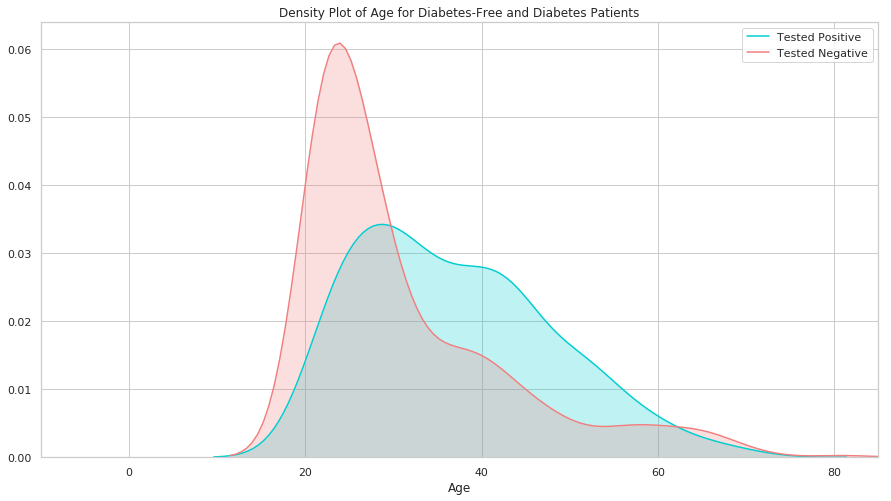

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataframe["Age"][dataframe.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataframe["Age"][dataframe.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Tested Positive', 'Tested Negative'])
plt.title('Density Plot of Age for Diabetes-Free and Diabetes Patients')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

We can see here that most women who tested positive were between the age of 25 and 50 and most who were negative were below 25

### Feature Selection
We are going to use Recursive Feature elimination to select features. It selects features by recursively considering smaller and smaller sets of features.  It works like gradient descent where the estimator is trained on initial sets of features an the coef_attribute of each feature is obtained. This coef tells us how important each attribute is. The least important features are pruned from th current set of features. This procdure is repeated until the desired number of features is selected.

We also use K-Fold Cross Validation on our data to prevent overfitting and improve confidence of features selected

In [ ]:
#Defining inputs and output
attributes = dataframe.columns[:8]
X = dataframe[attributes]
y = dataframe.Outcome

#Perform cross validaton
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

LogisticRegression(solver='lbfgs')

#Build a logreg and compute the feature importance
model =  LogisticRegression()

# create the RFE model 
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=kfold,
    scoring='accuracy'
)
#rfecv = rfecv.fit(X, y)
rfecv = rfecv.fit(os_data_X, os_data_y.values.ravel())

# summarize the selection of the attributes
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(os_data_X.columns[rfecv.support_]))

Optimal number of features: 4
Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


### Correlation Matrix
A matrix of correlations provides useful insight into relationships between pairs of variables.

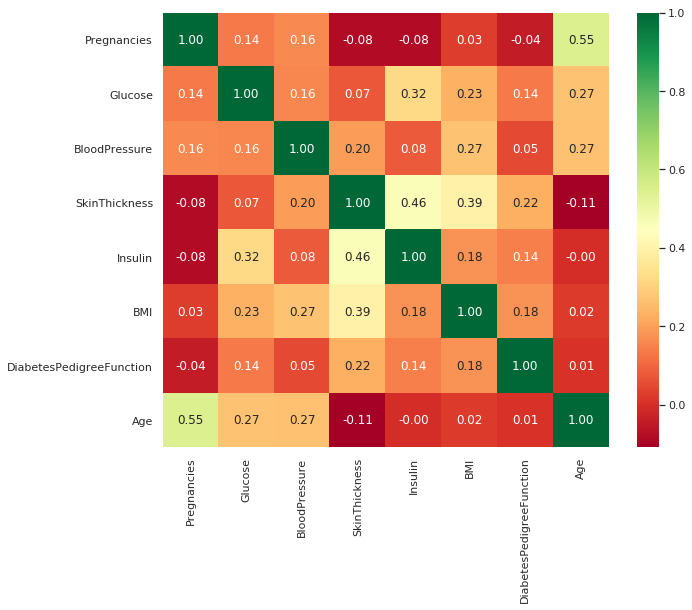

In [ ]:
sns.heatmap(
    data=os_data_X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

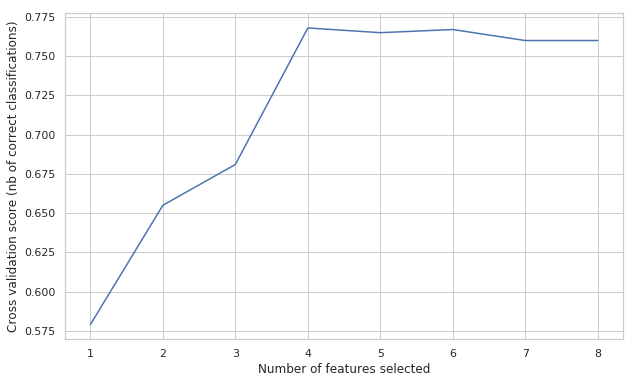

In [ ]:
#Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Four features have been selected and we get the correlation matrix below

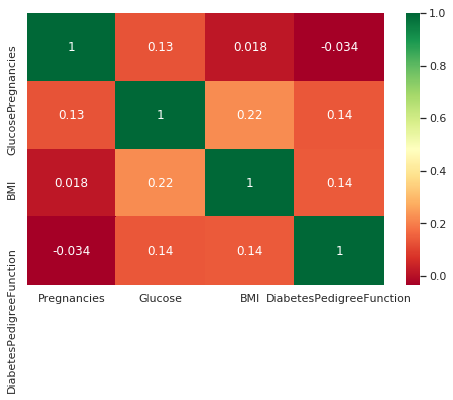

In [ ]:
Selected_features =['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = dataframe[Selected_features]
9
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Evaluating our Model

In [ ]:
scores_accuracy = cross_val_score(model, os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='accuracy') * 100
scores_log_loss = cross_val_score(model, os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='neg_log_loss')* 100
scores_auc = cross_val_score(model, os_data_X, os_data_y.values.ravel(), cv=kfold, scoring='roc_auc')* 100
print('K-fold cross-validation results:')
print(model.__class__.__name__+" average accuracy is %2.3f " % scores_accuracy.mean())
print(model.__class__.__name__+" average log_loss is %2.3f " % -scores_log_loss.mean())
print(model.__class__.__name__+" average auc is %2.3f " % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 76.000 
LogisticRegression average log_loss is 50.614 
LogisticRegression average auc is 84.790 


### Confusion Matrix and Classification Report

In [ ]:
# The confusion  and classification report
#Get our result predictions 
y_pred = cross_val_predict(model, os_data_X, os_data_y.values.ravel(), cv=kfold)
#Get our confusion matrix
conf_mat = confusion_matrix(os_data_y.values.ravel(), y_pred)
class_report = classification_report(os_data_y.values.ravel(),y_pred)
print(conf_mat)
print(class_report)

[[388 112]
 [128 372]]
             precision    recall  f1-score   support

          0       0.75      0.78      0.76       500
          1       0.77      0.74      0.76       500

avg / total       0.76      0.76      0.76      1000



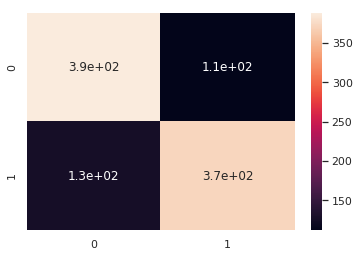

In [ ]:
# Transform to df for easier plotting
outcome_labels = sorted(dataframe.Outcome.unique())

sns.heatmap(
    confusion_matrix(os_data_y.values.ravel(), y_pred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [ ]:
print(" Accuracy is %2.3f " % scores_accuracy.mean())

 Accuracy is 76.000 
